In [14]:
import pandas as pd
import numpy as np
import zipfile
from hazm import word_tokenize, Stemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
stemmer=Stemmer()

In [3]:
with zipfile.ZipFile(r'C:\Users\mahdi\Downloads\archive (2).zip', 'r') as zip_ref:
    file_name=zip_ref.namelist()[0]
    zip_ref.extractall(r'C:\Users\mahdi\Documents\jupyter-notebook\data_science_course\test')
   

In [4]:
df=pd.read_csv(file_name, encoding='utf8',sep='\t+', on_bad_lines='skip')
df.head()

C:\Users\mahdi\AppData\Local\Temp\ipykernel_9284\4173457105.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(file_name, encoding='utf8',sep='\t+', on_bad_lines='skip')


,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


<Axes: >

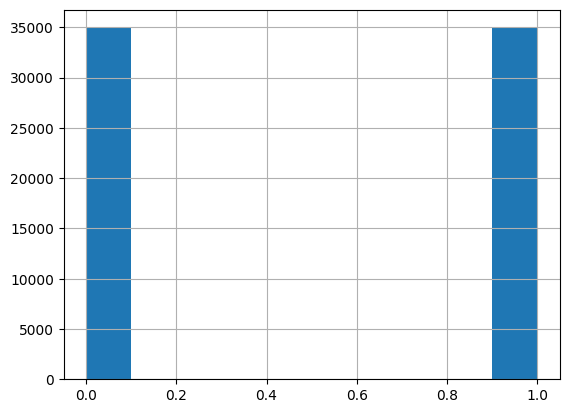

In [27]:
df['label_id'].hist()

In [5]:
df.drop('label', axis=1, inplace=True)

In [6]:
with open('stopwords.txt', 'r', encoding='utf8') as stopwords_file:
    stopwords=stopwords_file.readlines()
stopwords=[letter.replace('\n', '') for letter in stopwords]
stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '...',
 '....',
 '/',
 ':',
 '<',
 '=',
 '>',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '«',
 '»',
 '،',
 '؛',
 '؟',
 'ء',
 'آاو و و و',
 'آباد',
 'آخ',
 'آخر',
 'آخرها',
 'آخه',
 'آدمهاست',
 'آرام',
 'آرام آرام',
 'آره',
 'آری',
 'آزادانه',
 'آسان',
 'آسانی',
 'آسيب پذيرند',
 'آسیب',
 'آسیب پذیرند',
 'آشكارا',
 'آشنايند',
 'آشنایند',
 'آشکارا',
 'آقا',
 'آقای',
 'آقایان',
 'آمد',
 'آمدن',
 'آمده',
 'آمرانه',
 'آن',
 'آن ها',
 'آن گاه',
 'آنان',
 'آناني',
 'آنانی',
 'آنجا',
 'آنرا',
 'آنطور',
 'آنقدر',
 'آنكه',
 'آنها',
 'آنهاست',
 'آنچنان',
 'آنچنان كه',
 'آنچنان که',
 'آنچه',
 'آنکه',
 'آنگاه',
 'آن\u200cها',
 'آهان',
 'آهاي',
 'آهای',
 'آور',
 'آورد',
 'آوردن',
 'آورده',
 'آوه',
 'آيا',
 'آيد',
 'آی',
 'آیا',
 'آید',
 'آیند',
 'ا',
 'ابدا',
 'ابلهانه',
 'ات',
 'اتفاقا',
 'اثر',
 'اثرِ',
 'اجراست',
 'احتراما',
 'احتمالا',
 'احياناً',
 'احیانا',
 'احیاناً',
 'اخ',
 'اختصارا',

In [7]:
dataset=pd.DataFrame(columns=['comment', 'label'])

In [8]:
for index, row in df.iterrows():
    title_body=row['comment']
    title_body_tokenize=word_tokenize(title_body)
    title_body_tokenize_filtered=[word  for word in title_body_tokenize if word not in stopwords]
    title_body_tokenize_filtered_stemmed=[stemmer.stem(word) for word in title_body_tokenize_filtered]
    dataset.loc[index] = {
        'comment': ' '.join(title_body_tokenize_filtered_stemmed),
        'label':df['label_id']
    }   

In [12]:
dataset['label']=df['label_id']

In [13]:
dataset

,comment,label
0,حیف وق بنویس سرویس دهیتون افتضاح,1
1,ساعته برسه ساع موقع ببین چقدرررررررررررر پلاک ...,0
2,قیم مدل کیفیت سازگار ظاهر فریبنده پر کالباس قارچ,1
3,عاللل اندازه کیف امیداور کیفیتتون مشتر,0
4,شیرین وانیل مدل,0
...,...,...
69995,سلا فاکتور غذا سفار احتیاج قسم سفار اضافه نیاو...,1
69996,سایز پیتزا سفارشات گذ شده_بود,1
69997,قارچ اضافه اضافه کرده_بود اضافه نمی‌کرد نمیدون...,0
69998,همرو ساع تاخیر اشتباه پول هوا,1


In [15]:
vectorize=TfidfVectorizer()
vectorize.fit(dataset['comment'])

TfidfVectorizer()

In [16]:
X=vectorize.transform(dataset['comment'])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y=dataset['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf=RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [23]:
rf.score(X_test, y_test)

0.7882285714285714

In [24]:
from sklearn.metrics import classification_report

In [25]:
rf_pred=rf.predict(X_test)

In [26]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78      8632
           1       0.77      0.84      0.80      8868

    accuracy                           0.79     17500
   macro avg       0.79      0.79      0.79     17500
weighted avg       0.79      0.79      0.79     17500



In [28]:
from sklearn.svm import SVC

In [29]:
sv=SVC(gamma='auto', kernel='rbf')
sv.fit(X_train, y_train)

SVC(gamma='auto')

In [30]:
sv.score(X_test, y_test)

0.49325714285714284

In [31]:
sv_pred=sv.predict(X_test)

In [32]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      8632
           1       0.00      0.00      0.00      8868

    accuracy                           0.49     17500
   macro avg       0.25      0.50      0.33     17500
weighted avg       0.24      0.49      0.33     17500



C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo